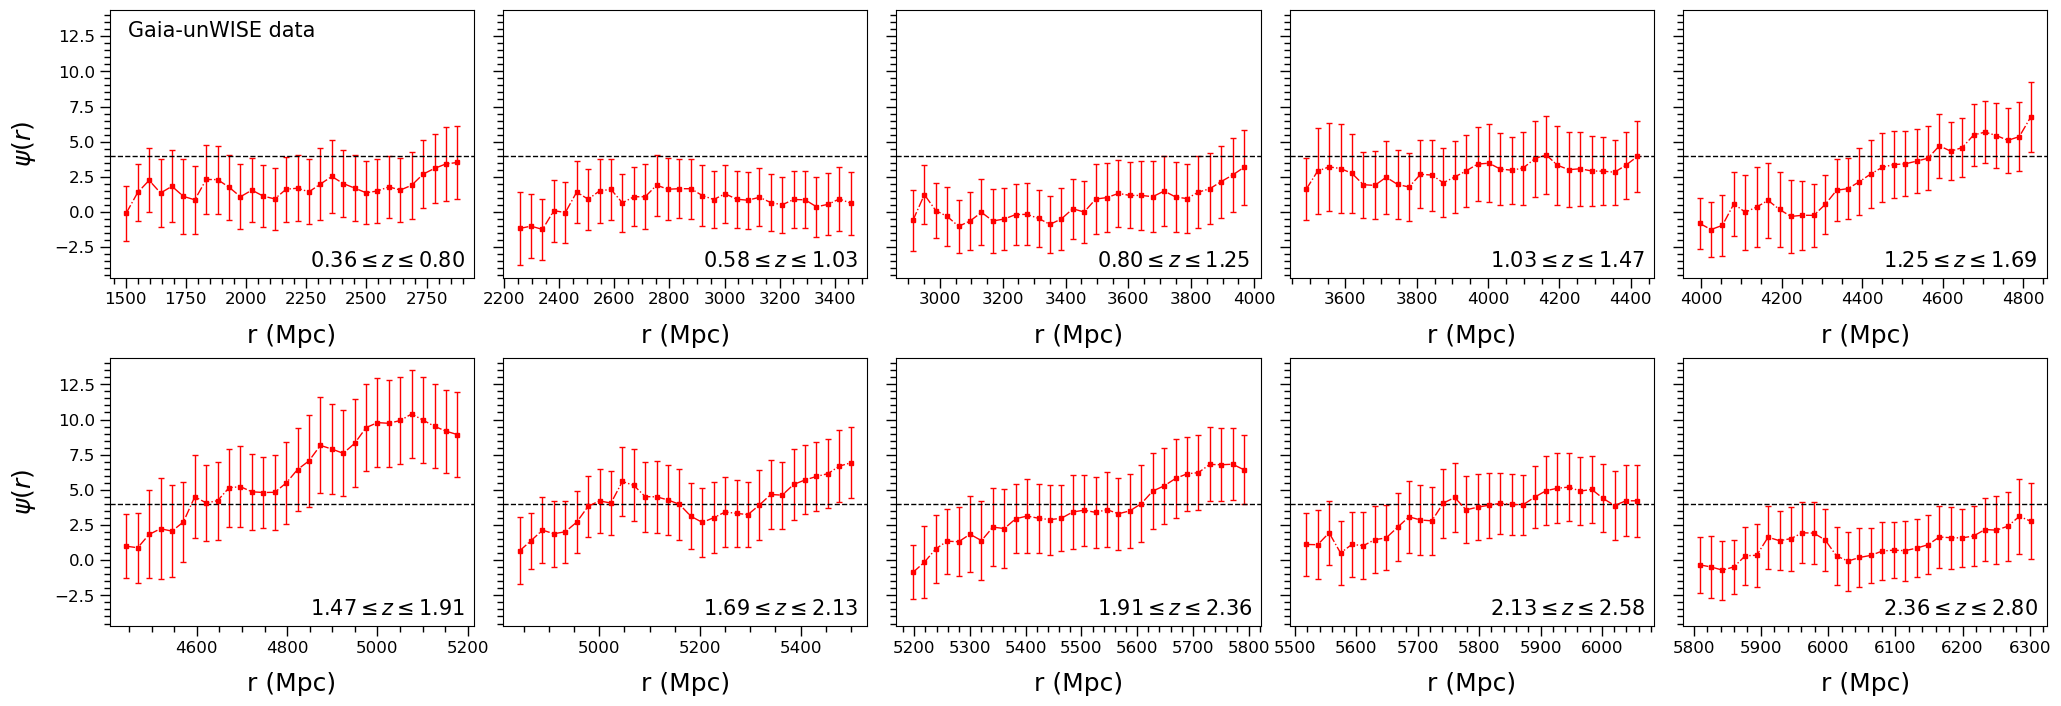

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
import os
output_dir = "../../../../results/supplementary_plots"
os.makedirs(output_dir, exist_ok=True)

# # Disable LaTeX rendering
# plt.rcParams['text.usetex'] = False

# Redshift bin width
d = 0.4436

# Create figure and axes (2 rows × 5 columns)
fig, axes = plt.subplots(2, 5, figsize=(25, 8), sharey=True)
fig.subplots_adjust(wspace=0.05, hspace=0.35)

# Loop over samples
for i in range(10):

    ax = axes[i // 5, i % 5]

    # Read data
    f_name1 = f'inter_data1/sample_{i+1}_criteria_err.csv'
    df1 = pd.read_csv(f_name1)

    f_name2 = f'inter_data2/sample_rand_{i+1}_criteria.csv'
    df2 = pd.read_csv(f_name2)

    # Extract arrays
    R = df1['r'].to_numpy()
    cri = df1['crit'].to_numpy()
    d_cri = df1['sd'].to_numpy()

    R_rand = df2['r'].to_numpy()
    cri_rand = df2['crit'].to_numpy()
    d_cri_rand = df2['sd'].to_numpy()

    # ---- DO NOT CHANGE CALCULATIONS ----
    new_cri = (cri - cri_rand) / d_cri_rand
    d_new_cri = np.sqrt(d_cri**2 + d_cri_rand**2) / d_cri_rand
    # -----------------------------------

    # Plot
    ax.errorbar(
        R, new_cri,
        yerr=d_new_cri,
        ls='-.', lw=1,
        marker='s', markersize=3,
        c='r', ecolor='r',
        elinewidth=1, capsize=2)

    ax.axhline(y=4, color='black', linestyle='--', linewidth=1)


    # Axis labels
    ax.set_xlabel("r (Mpc)", fontsize=18, labelpad = 12)

    if(i==0 or i==5):
        ax.set_ylabel(r"$\psi(r)$", fontsize=18, labelpad = 12)

    # Ticks
    ax.xaxis.set_minor_locator(AutoMinorLocator())
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    ax.tick_params(which='both', width=1, labelsize=12)
    ax.tick_params(which='major', length=7)
    ax.tick_params(which='minor', length=4)

    # Redshift annotation
    zmin = 0.36 + i * d / 2
    zmax = 0.36 + i * d / 2 + d


    if(i==0):
        ax.text(
        0.05, 0.90, 'Gaia-unWISE data',
        transform=ax.transAxes,
        fontsize=15)
        
    ax.text(
        0.55, 0.04,
        rf"${zmin:.2f} \leq z \leq {zmax:.2f}$",
        transform=ax.transAxes,
        fontsize=15)


     
# Save and show
plt.subplots_adjust(
    hspace=0.30,  # vertical space between rows
    wspace=0.08   # horizontal space between columns 
        )
# plt.savefig("scanning_new.pdf", bbox_inches='tight')
plt.savefig("../../../../results/supplementary_plots/suppl_fig12.pdf", bbox_inches='tight')
plt.show()


In [ ]:
import shutil
shutil.rmtree('inter_data1')
shutil.rmtree('inter_data2')     